# ZOMATO API - II

The dataset is highly skewed toward the cities included in Delhi-NCR. So, w
e will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, 
Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### Ques-1
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [244]:
import pandas as pd
import numpy as np
import requests as req
import matplotlib.pyplot as plt

In [3]:
#We open the csv file using pandas inbuilt function we make a copy of the dataset in order to get back the original 
#dataset wheneverwe want
data_set = pd.read_csv('./zomato.csv',encoding="ISO-8859-1")
df = data_set.copy()

In [4]:
#Using the acces token we will fetch data from zomato API
headers = {'user-key':'3a93e511d6b62cf9ecac9f642d279c3c'}

In [5]:
## Inorder to work on data only confined to india we first need to fetch the country code of india using the 
## ZOMATO API
res = req.get('https://developers.zomato.com/api/v2.1/cities',headers = headers,params={'q':'Delhi'})
country_code = res.json()['location_suggestions'][0]['country_id']

In [6]:
df_india = df[df['Country Code'] == country_code].copy()

In [7]:
#For the Ease of refering to a index we will reset the index of the df_india dataframe
df_india.reset_index(inplace = True,drop=True)

In [113]:
def check(a):
    if isinstance(a,str):
        if(a == 'New Delhi' or a == 'Ghaziabad' or a=='Noida' or a=='Gurgaon' or a=='Faridabad'):
            return True
    return False

df_india['is_ncr'] = df_india['City'].apply(check)

In [114]:
values = df_india['is_ncr'].value_counts().values
labels =['Delhi-NCR','Rest Of India']

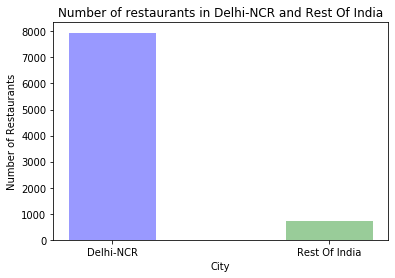

In [115]:
plt.bar(height = values,x=labels,width=0.4,color=['Blue','Green'],alpha=0.4)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Number of restaurants in Delhi-NCR and Rest Of India')
plt.show()

# Ques-2 
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [58]:
## First we grouo the data on the basis of the loaction of city is in NCR or not and then find the values of cuisines 
cuisine_list = df_india.groupby('is_ncr')['Cuisines'].value_counts().index

In [88]:
# We maintain two set containing cuisines that are present in Delhi-ncr and cuisines that are present in rest of India
cuisine_ncr = set()
cuisine_rest = set()
for i in cuisine_list:
    cuisines = i[1].split(',');
    for cuisine in cuisines:
        cuisine_name = cuisine.strip()
        if i[0] == False:
            cuisine_rest.add(cuisine_name)
        else:
            cuisine_ncr.add(cuisine_name)

In [89]:
# Next we apply set substraction operation this gives us those values of cuisines that are present in rest of India 
# not in Delhi-ncr
cuisine_ans = cuisine_rest - cuisine_ncr

In [90]:
# Names of cuisines thar are not present in Delhi_Ncr but are present in rest of India
for name in cuisine_ans:
    print(name)

BBQ
Cajun
German
Malwani


In [91]:
#Next we call the Zomata API to find out which cuisines are actually served in Delhi -NCR , the city_id of Delhi -NCR 
#is 1
data = {'city_id':'1'}
res = req.get('https://developers.zomato.com/api/v2.1/cuisines',headers = headers,params = data)
cuisines_list = res.json()['cuisines']

In [92]:
cuisine_set=set()
for i in cuisines_list:
    cuisine_set.add(i['cuisine']['cuisine_name'])

In [93]:
cuisine_present = cuisine_ans-(cuisine_rest - cuisine_set)
for i in cuisine_present:
    print(i)

BBQ
Malwani


### This means that BBQ,Malwani Cuisines are actual served in Delhi-NCR but the dataset is incomplete

## Ques-3
Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [103]:
# We will ainatain two seperate list to store names of cuisines
cuisine_ncr = []
cuisine_rest = []
for i in cuisine_list:
    cuisines = i[1].split(',');
    for cuisine in cuisines:
        cuisine_name = cuisine.strip()
        if i[0] == False:
            cuisine_rest.append(cuisine_name)
        else:
            cuisine_ncr.append(cuisine_name)

In [105]:
# Convert arrays into numpy arrays
np_ncr = np.array(cuisine_ncr)
np_rest = np.array(cuisine_rest)

In [110]:
# Find the unique names of cuisines along with their frequency of occurence
ncr_name = np.unique(np_ncr,return_counts = True)[0]
ncr_value = np.unique(np_ncr,return_counts = True)[1]
rest_name = np.unique(np_rest,return_counts = True)[0]
rest_value = np.unique(np_rest,return_counts = True)[1] 

In [119]:
# Get thw top 10 cuisines being served in the restaurants
top_rest_cuisine = rest_name[rest_value.argsort()][-1:-11:-1]
top_ncr_cuisine = ncr_name[ncr_value.argsort()][-1:-11:-1]

In [121]:
print('Top 10 Cuisines In Delhi NCR')
print()
for i in top_ncr_cuisine:
    print('*',i)
print()
print('Top 10 Cuisines in Rest Of India')
print()
for i in top_rest_cuisine:
    print('*',i)    

Top 10 Cuisines In Delhi NCR

* North Indian
* Chinese
* Italian
* Continental
* Fast Food
* South Indian
* Cafe
* Street Food
* Mughlai
* Mithai

Top 10 Cuisines in Rest Of India

* North Indian
* Chinese
* Continental
* Italian
* Cafe
* Fast Food
* Mexican
* Desserts
* South Indian
* Asian


## Ques -4
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference

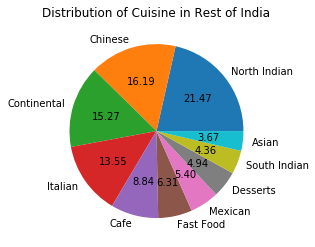

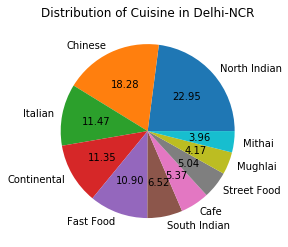

In [153]:
# we will use the values as obtained from the previous question
plt.pie(rest_value[rest_value.argsort()][-1:-11:-1],labels=top_rest_cuisine,autopct='%0.2f')
plt.title('Distribution of Cuisine in Rest of India')
plt.show()
plt.pie(ncr_value[ncr_value.argsort()][-1:-11:-1],labels=top_ncr_cuisine,autopct='%0.2f')
plt.title('Distribution of Cuisine in Delhi-NCR')
plt.show()

## Few Inferences that can be drawn from these pie charts are:-
1. The percentage of north indian cuisine is almost same in both the regions.<br>
2. People is rest of the country prefer continental food over Italian food while the stituation is reversed in case of     Delhi-NCR region<br>
3. The Consumption of fast food is very high in Delhi-NCR region as compared to rest of India.<br>
4. South Indian Food is consumed in hiegher percentage as compared to other parts in Delhi-NCR.<br>
5. In Delhi-NCR region Mughlai Cuisine is a major cuisine while in other part of India itis not.Also Mexican food is a     major cuisine in rest of India but not in Delhi -NCR region.


## User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant. 


# Ques -1
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

    Number of Votes given Restaurant
    Restaurant serving more number of cuisines.
    Average Cost of Restaurant
    Restaurant serving some specific cuisines.


In [141]:
x = df_india['Votes'].values
y = df_india['Aggregate rating'].values

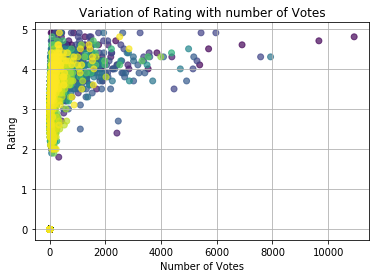

In [156]:
colors = np.arange(len(x))
plt.grid()
plt.scatter(x,y,c=colors,alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Variation of Rating with number of Votes')
plt.show()

### Inferences Drawn:-
1. Number of resturants getting rating between 4 and 5 is maximum where the restaurant have votes between 0-2000
2. The retaurant with heighest number of votes have a rating close to 5.
3. Most restaurants receive votes between 0-2000

In [170]:
# To find out the relation between number of cusines served and the rating of the restaurant we will maitain to lists 
# which will store the average rating of the restaurant and the number of cuisines served
cuisine_num = []
rating_list = []
def generator(cuisines_list,rating):
        cuisines = cuisines_list.split(',');
        cuisine_num.append(len(cuisines))
        rating_list.append(rating)
for i in range(0,8652):
    generator(df_india.iloc[i]['Cuisines'],df_india.iloc[i]['Aggregate rating'])

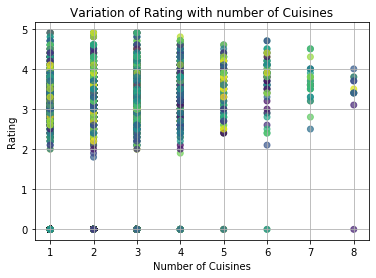

In [180]:
colors = np.random.randint(1,100000,len(cuisine_num))
plt.grid()
plt.scatter(cuisine_num,rating_list,c=colors,alpha=0.7)
plt.xlabel('Number of Cuisines')
plt.ylabel('Rating')
plt.title('Variation of Rating with number of Cuisines')
plt.show()

### Inferences Drawn:-
1. It is clear from the figure that the restaurant with hieghest number of cuisine barely croses 4 rating mark.
2. After 6 cuisines the maximum rating acheived by the restaurant decreases.
3. 5 rating is acheived by restaurants serving less than or equal to 3 cuisines.
4. The spread of the rating is maximum with restaurants having 2 cuisines.
5. Maximum restaurants serve only 1 type of cuisine.

In [62]:
# To find out the relation between number of cusines served and the rating of the restaurant we will maitain to lists 
# which will store the average rating of the restaurant and the cost of two eating 
cost_list=df_india['Average Cost for two'].values
rating_list = df_india['Aggregate rating'].values

In [28]:
min_cost = df['Average Cost for two'].min()
max_cost = df['Average Cost for two'].max()

In [58]:
# we will ttry to group the cost into buckets and then calculate the average rating of the bucket
# for creating 10 equally spaced buckets we use numpy function
buckets = np.linspace(min_cost,8000,20,dtype=int)

In [68]:
mean_list = []
for i in range(0,len(buckets)-1):
    cost_mean = df_india[(df_india['Average Cost for two']>= buckets[i])&(df_india['Average Cost for two']< buckets[i+1])]['Aggregate rating'].mean()
    mean_list.append(round(cost_mean,2))
mean_list.append(round(df_india[df_india['Average Cost for two']>= buckets[i+1]]['Aggregate rating'].mean(),2))

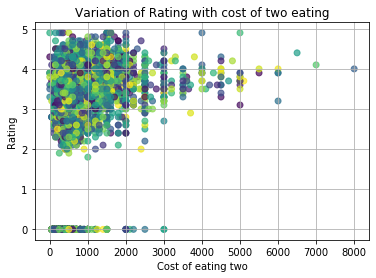

In [70]:
# First we try to analyse a simple scatter plot of ratings with cost of two.This actually doesnot provide many insights 
# of the data
colors = np.random.randint(1,100000,len(rating_list))
plt.grid()
plt.scatter(cost_list,rating_list,c=colors,alpha=0.7)
plt.xlabel('Cost of eating two')
plt.ylabel('Rating')
plt.title('Variation of Rating with cost of two eating')
plt.show()

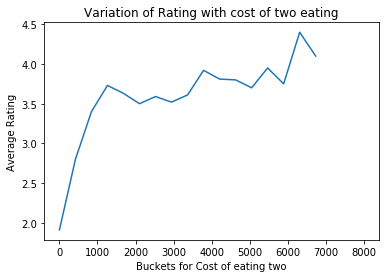

In [71]:
# We now plot a line graph of mean of ratings with our buckets array
plt.xlabel('Buckets for Cost of eating two')
plt.ylabel('Average Rating')
plt.title('Variation of Rating with cost of two eating')
plt.plot(buckets,mean_list)
plt.show()

This graph provide us with some insights.
### Inferences drawn:-
1. The maximum rating is acheived for restaurant having cost of two between 6000-7000
2. Rating between 4 -5 is given to restaurants those who have cost of two between 4000-8000.
3. There is no direct praportional relation between cost of two persons eating and the rating given to the restaurant.

In [74]:
# We will ainatain two seperate list to store names of cuisines
cuisine_list = []
rating_list = []
def generator(cuisines_list,rating):
        cuisines = cuisines_list.split(',');
        for cuisine in cuisines:
            cuisine_list.append(cuisine.strip())
            rating_list.append(rating)

for i in range(0,8652):
    generator(df_india.iloc[i]['Cuisines'],df_india.iloc[i]['Aggregate rating'])

In [79]:
np_cuisine = np.array(cuisine_list)
np_rating  = np.array(rating_list)

In [103]:
cuisine_names = np.unique(np_cuisine)

In [106]:
mean_rating =[]
for i in cuisine_names:
    mean = np_rating[np_cuisine == i].mean()
    mean_rating.append(round(mean,2))
mean_rating = np.array(mean_rating)

In [110]:
## For ease of display we will compare top 10 cuisines that got most rating
x = cuisine_names[mean_rating.argsort()][-1:-10:-1]
y = mean_rating[mean_rating.argsort()][-1:-10:-1]

In [129]:
# we will also find the least rated cuisine
print(cuisine_names[mean_rating.argsort()][1], mean_rating[mean_rating.argsort()][0])

Armenian 0.0


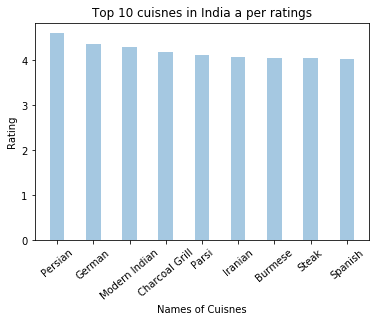

In [126]:
plt.bar(height = y,x=x,width=0.4,alpha=0.4)
plt.xlabel('Names of Cuisnes')
plt.xticks(rotation = 40)
plt.ylabel('Rating')
plt.title('Top 10 cuisnes in India a per ratings')
plt.show()

### Inferences Drawn:-
1. It is intersting to note that Indian cuisine itself is not in 10 10 cuisines in India.
2. The most liked cuisine is Persian.
3. Persian , German ,Mordern Indian are most liked and they have rating between 4-5.
4. Modern Indian cuisne is prefered over tradional Indian food in India.
5. The least rated cuisine is Armenian.

## Ques - 6
Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

    Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .


In [207]:
## In Order to find the weighted resturant rating we will use the groupby clause of the pandas in order to group
## retaurants belonging to sam elocality togather.Then we get the agregate rating and votes column from the dataframe
## and apply our function inorder to calculate the weight 
locality = []
weighted_rating = []
def rating(data):
    values = data.values
    votes = 0
    rating = 0
    for value in values:
        votes+=value[1]
        rating+=value[0]*value[1]
    weight = 0
    if(votes == 0):
        weight = 0
    else:
        weight = rating/votes
    weighted_rating.append(round(weight,2))
    locality.append(data.name)

arr = df_india.groupby('Locality')[['Aggregate rating','Votes']].apply(rating)


In [208]:
np_locality = np.array(locality)
np_rating = np.array(weighted_rating)

In [209]:
top_locality_list = np_locality[np_rating.argsort()][-1:-11:-1]
top_rating_list = np_rating[np_rating.argsort()][-1:-11:-1]

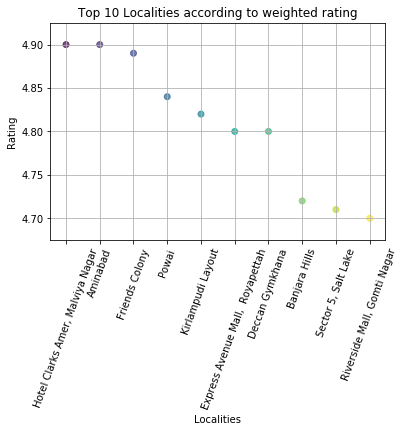

In [225]:
colors = np.arange(0,len(top_locality_list))
plt.scatter(y = top_rating_list,x=top_locality_list,alpha=0.7,c=colors)
plt.xlabel('Localities')
plt.xticks(rotation = 70)
plt.ylabel('Rating')
plt.title('Top 10 Localities according to weighted rating')
plt.grid()
plt.show()

### List of Top 10 localities:
Hotel Clarks Amer, Malviya Nagar<br>
Aminabad<br>
Friends Colony<br>
Powai<br>
Kirlampudi Layout<br>
Express Avenue Mall,  Royapettah<br>
Deccan Gymkhana<br>
Banjara Hills<br>
Sector 5, Salt Lake<br>
Riverside Mall, Gomti Nagar<br>

## Visualization

Plot the bar graph top 15 restaurants have a maximum number of outlets.

In [232]:
name=df_india['Restaurant Name'].value_counts().index
outlets = df_india['Restaurant Name'].value_counts().values

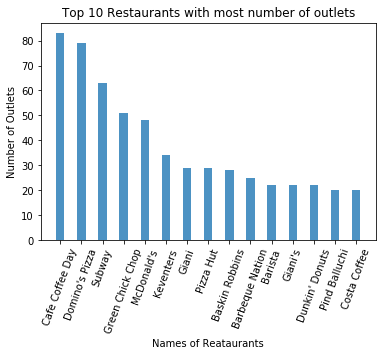

In [242]:
plt.bar(height = outlets[:15],x=name[:15],width=0.4,alpha=0.8)
plt.xlabel('Names of Reataurants')
plt.xticks(rotation = 70)
plt.ylabel('Number of Outlets')
plt.title('Top 10 Restaurants with most number of outlets')
plt.show()

Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

In [238]:
restaurants = df_india[df_india['Aggregate rating'] != 0]['Aggregate rating']

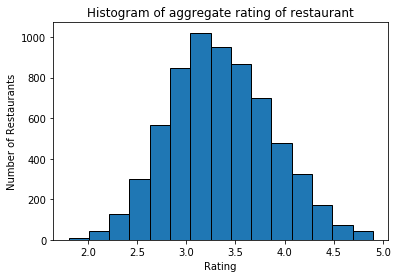

In [252]:
plt.hist(x = restaurants,bins=15,edgecolor='black')
plt.title('Histogram of aggregate rating of restaurant')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

Plot the bar graph top 10 restaurants in the data with the highest number of votes.

In [266]:
# We have asumed that restaurants having smae name but diffrent cities are diffrent
name = df_india['Restaurant Name'].values
votes = df_india['Votes'].values
name_list = name[votes.argsort()][-1:-11:-1]
vote_list = votes[votes.argsort()][-1:-11:-1]

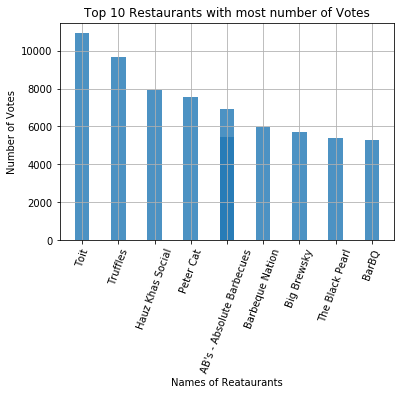

In [305]:
plt.bar(height = vote_list,x=name_list,width=0.4,alpha=0.8)
plt.xlabel('Names of Reataurants')
plt.xticks(rotation = 70)
plt.grid()
plt.ylabel('Number of Votes')
plt.title('Top 10 Restaurants with most number of Votes')
plt.show()

Plot the pie graph of top 10 cuisines present in restaurants in the USA.

In [299]:
# Using the list country code as give in the question we find the country code for USA is 216
df_usa = df[df['Country Code'] == 216].copy()

In [300]:
#For the Ease of refering to a index we will reset the index of the df_india dataframe
df_usa.reset_index(inplace = True,drop=True)

In [316]:
cuisine_list = df_usa['Cuisines'].values

In [321]:
cuisine_names = []
for i in cuisine_list:
    if isinstance(i,float):
        continue
    cuisines = i.split(',');
    for cuisine in cuisines:
        cuisine_name = cuisine.strip()
        cuisine_names.append(cuisine_name)

In [323]:
name = np.unique(np.array(cuisine_names),return_counts = True)[0]
value = np.unique(np.array(cuisine_names),return_counts = True)[1]

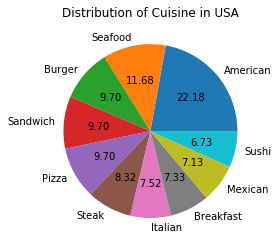

In [324]:
# we will use the values as obtained from above
plt.pie(value[value.argsort()][-1:-11:-1],labels=name[value.argsort()][-1:-11:-1],autopct='%0.2f')
plt.title('Distribution of Cuisine in USA')
plt.show()

Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [329]:
city = []
weighted_rating = []
def rating(data):
    values = data.values
    votes = 0
    rating = 0
    for value in values:
        votes+=value[1]
        rating+=value[0]*value[1]
    weight = 0
    if(votes == 0):
        weight = 0
    else:
        weight = rating/votes
    weighted_rating.append(round(weight,2))
    city.append(data.name)

arr = df_india.groupby('City')[['Aggregate rating','Votes']].apply(rating)

In [332]:
city_names = df_india['City'].value_counts().index
num = df_india['City'].value_counts().values

In [353]:
num_list = []
for i in range(0,len(city)):
    num_list.append(num[city_names == city[i]][0])

In [354]:
# In order to display we will take top 10 cities
city = np.array(city)
num_list = np.array(num_list)
weighted_rating = np.array(weighted_rating)

In [362]:
x = city[num_list.argsort()][-1:-11:-1]
y = num_list[num_list.argsort()][-1:-11:-1]
s = weighted_rating[num_list.argsort()][-1:-11:-1]

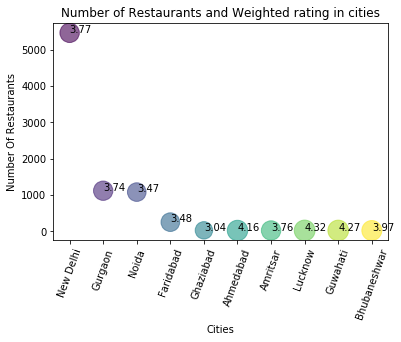

In [385]:
colors=np.arange(len(x))
plt.scatter(x,y,s = s*100,alpha=0.6,c=colors)
for i in range(0,len(x)):
    plt.text(x[i],y[i]+0.1,str(s[i]))
plt.ylabel('Number Of Restaurants')
plt.xlabel('Cities')
plt.title('Number of Restaurants and Weighted rating in cities')
plt.xticks(rotation=70)
plt.show()